In [2]:
import numpy as np
import pylab as pl
import tensorflow as tf

%matplotlib inline

In [3]:
errfunc=lambda tmp : 1.5*tmp[0]*tmp[1]+tmp[0]**2+tmp[1]**2

In [98]:
tf.reset_default_graph()
w=tf.Variable([30.,10.])
x=tf.placeholder(tf.float32,(2,))
E=errfunc(w)

# Two different optimizers -> manually edit optimization loop below to test
opt=tf.train.GradientDescentOptimizer(learning_rate=.3).minimize(E)
adaopt=tf.train.AdagradOptimizer(learning_rate=20).minimize(E)

In [99]:
try: sess.close()
except: pass
sess=tf.Session()
sess.run(tf.global_variables_initializer())

ws=[];es=[]
for count in range(50):
    
    # Storing values
    ws.append(sess.run(w))
    es.append(sess.run(E))
    
    # Feedback
    if count%10==0: print("E is "+str(sess.run(E)))

    # optimizing
    #sess.run(adaopt)
    sess.run(opt)

ws=np.array(ws)

E is 1450.0
E is 1.93798
E is 0.0751151
E is 0.00291143
E is 0.000112846


In [100]:
# Generating visualization
xr=pl.linspace(-30,30,100);yr=pl.linspace(-30,30,100)

x,y=pl.meshgrid(xr,yr)
c=np.zeros((100,100))
for cx in range(100):
    for cy in range(100):
        
        intmp=[xr[cx],yr[cy]]
        c[cx,cy]=errfunc(intmp)

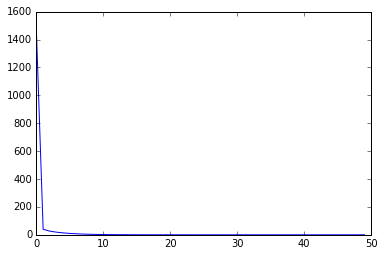

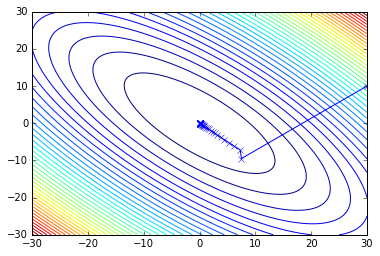

In [101]:
pl.figure()
pl.plot(es)
pl.figure()
pl.contour(x,y,c,50)
pl.plot(*ws.T,marker='x')